         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

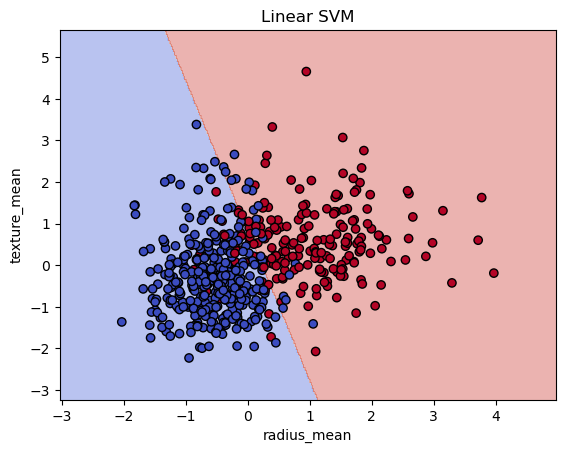

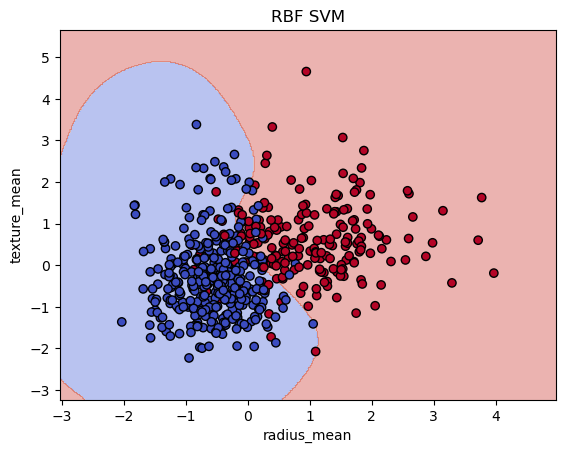

Best parameters from GridSearchCV: {'C': 0.1, 'gamma': 'scale'}
Best cross-validation score: 0.9033845676137245
Cross-validation accuracy scores: [0.85087719 0.89473684 0.90350877 0.93859649 0.92920354]
Mean accuracy: 0.9033845676137245


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load data
df = pd.read_csv(r"C:\Users\Thrishaa J\Downloads\breast-cancer.csv")

# Preview and clean (adjust based on actual columns)
print(df.head())
df.dropna(inplace=True)

# Convert target to binary if not already
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select 2 features for visualization
features = ['radius_mean', 'texture_mean']  # change if not present
X = df[features]
y = df['diagnosis']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM with linear and RBF kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Accuracy
print("Linear SVM accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("RBF SVM accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "Linear SVM")
plot_decision_boundary(svm_rbf, X_scaled, y, "RBF SVM")

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best parameters from GridSearchCV:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Cross-validation with best model
best_svm = grid.best_estimator_
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
